# Question 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

In [2]:
root = './A2_resources/'

In [3]:
def read(path, arg = cv2.IMREAD_UNCHANGED):
    args = {'gray' : cv2.IMREAD_GRAYSCALE, 'unchanged' : cv2.IMREAD_UNCHANGED, 'color' : cv2.IMREAD_COLOR}
    return cv2.imread(path, args[arg])

In [4]:
def strided(img, kernel):
    img = img.astype('float32')
    img = np.pad(img, (np.int16((kernel.shape[0]-1)/2), np.int16((kernel.shape[1]-1)/2)), 'reflect')
    expanded_input = np.lib.stride_tricks.as_strided(
    img,
    shape=(
        img.shape[0] - kernel.shape[0] + 1,
        img.shape[1] - kernel.shape[1] + 1,
        kernel.shape[0],
        kernel.shape[1],
    ),
    strides=(
        img.strides[0],
        img.strides[1],
        img.strides[0],
        img.strides[1],
    )
)
    return expanded_input

## Part 1

In [5]:
def applyFilter(imfilter, img, window, sigma_r, sigma_d):
    if len(img.shape) == 2:
        return imfilter(img,window, sigma_r, sigma_d)
    else:
        return np.dstack((imfilter(img[:,:,0],window, sigma_r, sigma_d),imfilter(img[:,:,1],window, sigma_r, sigma_d),imfilter(img[:,:,2],window, sigma_r, sigma_d)))

### Bilateral filter
- The bilateral filter retains the edges while smoothening other regions.
- It is combination of two filter
    - Domain filter (gaussian kernel)
    - Range filter (dependent on neighbourhood)
- Domain filter is simply a gaussian kernel
- Range filter is calculated for each individual window. The range kernel is exp(-(window-pixel)/(2*sigma_r^2))
- The final kernel for each window is range_kernel.*domain_kernel

In [6]:
def  bilateralFilter(img, window, sigma_r, sigma_d):
    img = img.astype('float32')
    arr = np.arange(start = -(window//2), stop = window//2+1)
    xv, yv = np.meshgrid(arr, arr)
    domain_filter = np.exp(-(np.power(xv,2)+np.power(yv,2))/(2*np.power(sigma_d,2)))
    
    expanded_input = strided(img, np.ones((window, window)))
    out = expanded_input - strided(img, np.ones((1,1)))
    exp_out = np.exp(-np.power(out,2)/(2*(np.power(sigma_r,2))))
    filters = np.multiply(exp_out, domain_filter)
    app = np.multiply(filters, expanded_input)
    app = np.sum(np.sum(app, axis = 2), axis = 2)/(np.sum(np.sum(filters, axis = 2), axis= 2))

    return np.uint8(np.clip(app,0,255))

### Applying bilateral filter on sky.png

In [7]:
im = read(root+'sky.png', 'color')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

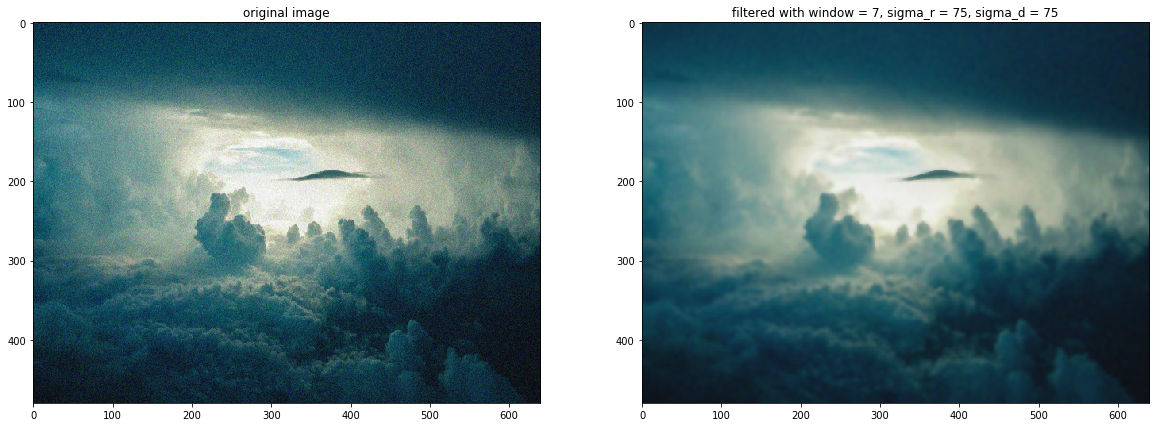

In [8]:
_,plots = plt.subplots(1,2,figsize = (20,20))
plots[0].imshow(im)
plots[0].set_title('original image')
plots[1].imshow(applyFilter(bilateralFilter,im,7,75,75), cmap = 'gray', vmin = 0 , vmax = 255)
plots[1].set_title('filtered with window = 7, sigma_r = 75, sigma_d = 75')

plt.show()

### Applying bilateral filter on sky.png

In [9]:
im = read(root+'noir.png', 'color')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

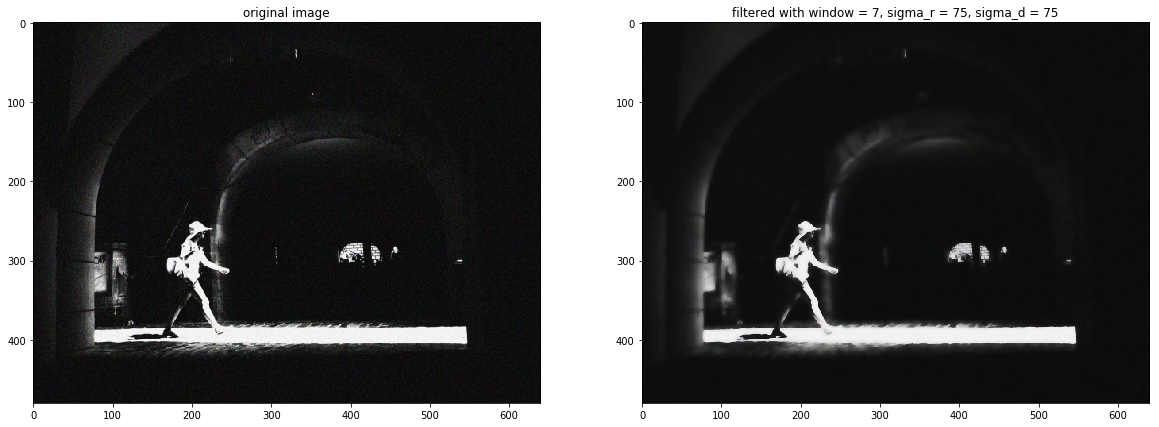

In [10]:
_,plots = plt.subplots(1,2,figsize = (20,20))
plots[0].imshow(im)
plots[0].set_title('original image')
plots[1].imshow(applyFilter(bilateralFilter,im,7,75,75), cmap = 'gray', vmin = 0 , vmax = 255)
plots[1].set_title('filtered with window = 7, sigma_r = 75, sigma_d = 75')

plt.show()

## Part 2

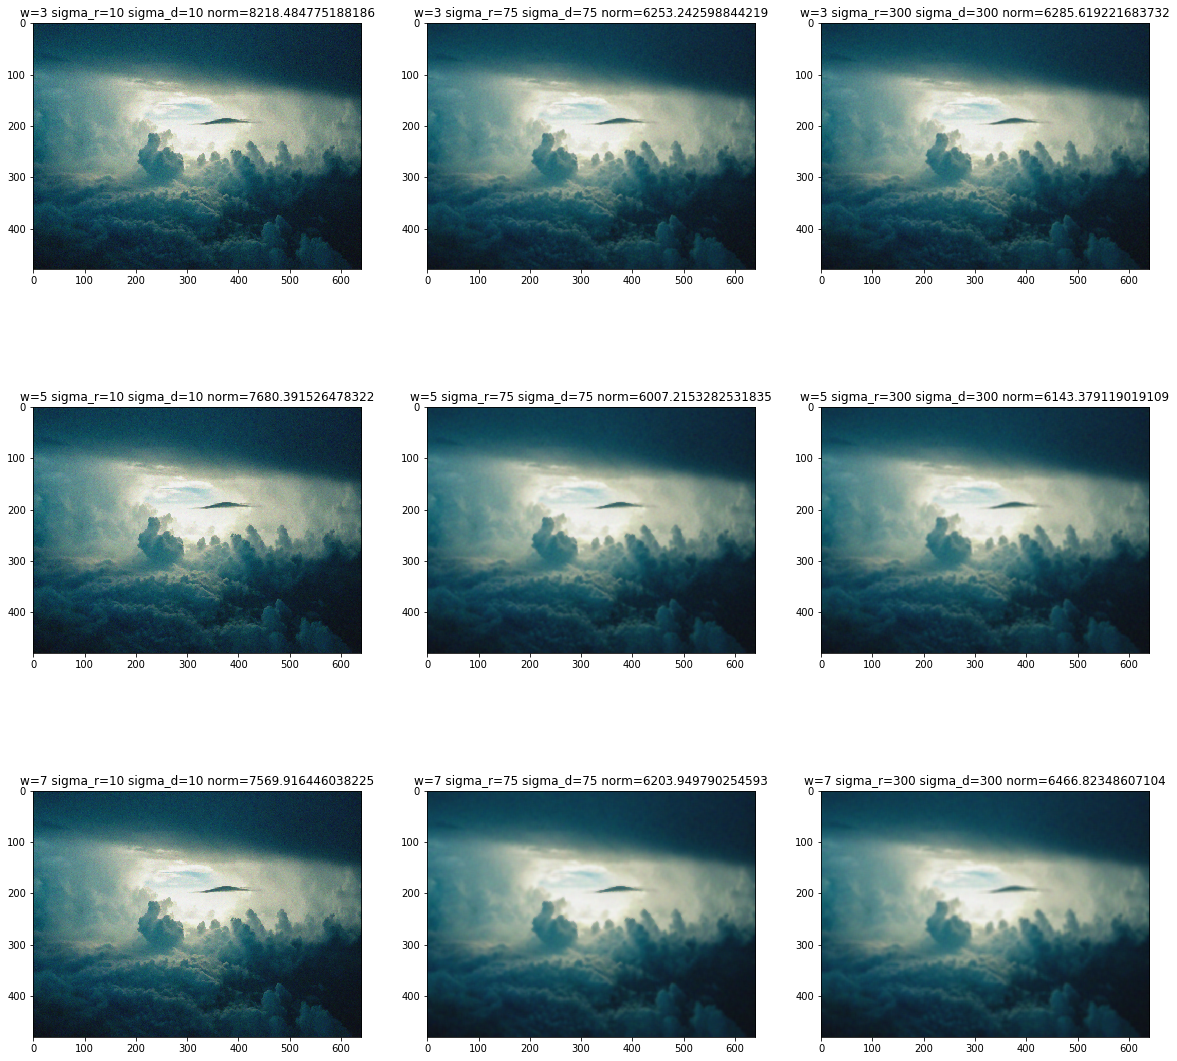

6007.2153282531835 5 75 75


In [11]:
gt = read(root+'gt_sky.png', 'color')
gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)

bt = read(root+'sky.png', 'color')
bt = cv2.cvtColor(bt, cv2.COLOR_BGR2RGB)

window = [3, 5, 7]
sigma_r = [10, 75, 300]
sigma_d = [10, 75, 300]
l2norm = float('inf')
ans_w = 3
ans_s = 10
ans_r = 10

_,plots = plt.subplots(3,3,figsize = (20,20))

for w in range(len(window)):
    for sr in range(len(sigma_r)):
        res = applyFilter(bilateralFilter, bt, window[w], sigma_r[sr], sigma_d[sr])
        norm = cv2.norm(res, gt)
        
        plots[w][sr].imshow(res)
        plots[w][sr].set_title('w='+str(window[w])+' sigma_r='+str(sigma_r[sr])+' sigma_d='+str(sigma_d[sr])+' norm='+str(norm))
        if norm < l2norm:
            l2norm = norm
            ans_w = window[w]
            ans_s = sigma_r[sr]
            ans_r = sigma_d[sr]

plt.show()
print(l2norm, ans_w, ans_r, ans_s)

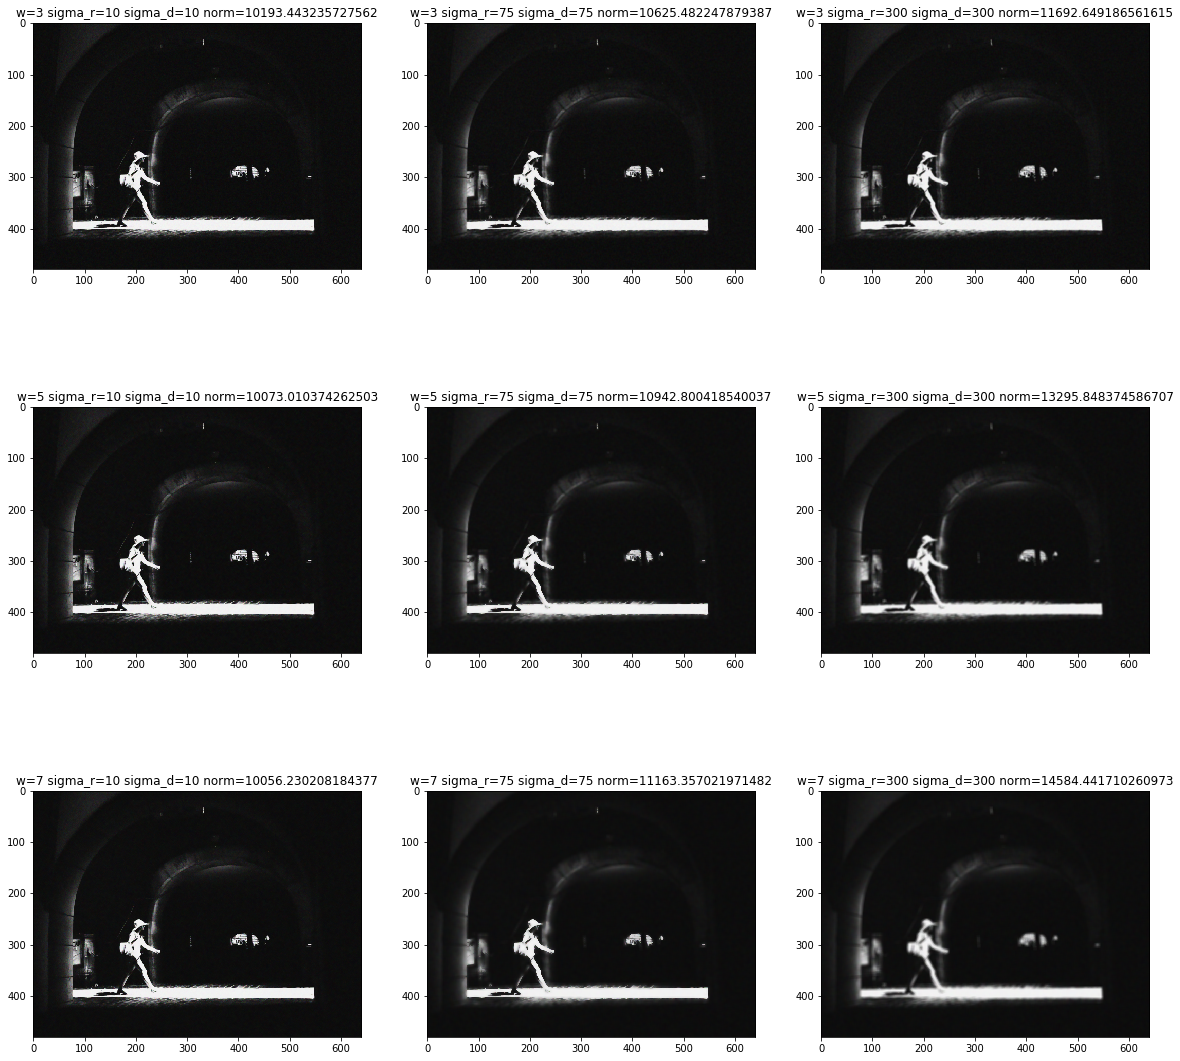

10056.230208184377 7 10 10


In [12]:
gt = read(root+'gt_noir.png', 'color')
gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)

bt = read(root+'noir.png', 'color')
bt = cv2.cvtColor(bt, cv2.COLOR_BGR2RGB)

window = [3, 5, 7]
sigma_r = [10, 75, 300]
sigma_d = [10, 75, 300]
l2norm = float('inf')
ans_w = 3
ans_s = 10
ans_r = 10

_,plots = plt.subplots(3,3,figsize = (20,20))

for w in range(len(window)):
    for sr in range(len(sigma_r)):
        res = applyFilter(bilateralFilter, bt, window[w], sigma_r[sr], sigma_d[sr])
        norm = cv2.norm(res, gt)
        
        plots[w][sr].imshow(res)
        plots[w][sr].set_title('w='+str(window[w])+' sigma_r='+str(sigma_r[sr])+' sigma_d='+str(sigma_d[sr])+' norm='+str(norm))
        if norm < l2norm:
            l2norm = norm
            ans_w = window[w]
            ans_s = sigma_r[sr]
            ans_r = sigma_d[sr]

plt.show()
print(l2norm, ans_w, ans_r, ans_s)

> The l2 distance is minimized by taking a 
- window of size 5, sigma_r = 75 and sigma_d = 75 and the minimum l2 distance is approx. 6007 for sky.png
- window of size 7, sigma_r = 10 and sigma_d = 10 and the minimum l2 distance is approx. 10056 for noir.png
- The l2 distance first decreases with window size(3->5) and after that it increases (5->7)
- The general trend is that l2 distance decreases with increasing sigma_r and sigma_d